In [76]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import vector

In [6]:
# Basic via files
file = uproot.open('uproot-tutorial-file.root')
print("file:", file)
print("keys:", file.keys())
print("classnames:", file.classnames())
print(file['Events'])

file: <ReadOnlyDirectory '/' at 0x7fb63037dc40>
keys: ['Events;1']
classnames: {'Events;1': 'TTree'}
<TTree 'Events' (6 branches) at 0x7fb630aa7b20>


In [86]:
# Trees
tree = file['Events']
print(tree.keys())
print("arrays:", tree.arrays())
print("arrays[10]",tree.arrays()[10].tolist())
print(tree.arrays()[20])

# Branches
branches = tree.arrays()
print(type(branches))
print(branches[0])          # ugly print
print(branches[0].tolist())
print(branches['nMuon'])
print(type(branches['nMuon']))
print(branches['Muon_pt'])

# Event
print(branches['Muon_pt'][0])
for i in range(10):
    print(branches['Muon_pt'][i])

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']
arrays: [{nMuon: 2, Muon_pt: [10.8, 15.7], Muon_eta: [1.07, ...], ...}, ..., {...}]
arrays[10] {'nMuon': 2, 'Muon_pt': [8.82088565826416, 17.640625], 'Muon_eta': [1.6479524374008179, 0.7153012156486511], 'Muon_phi': [-3.0666046142578125, -0.3867790102958679], 'Muon_mass': [0.10565836727619171, 0.10565836727619171], 'Muon_charge': [1, -1]}
{nMuon: 2, Muon_pt: [3.44, 12.8], Muon_eta: [2.14, ...], Muon_phi: [...], ...}
<class 'awkward.highlevel.Array'>
{nMuon: 2, Muon_pt: [10.8, 15.7], Muon_eta: [1.07, ...], Muon_phi: [...], ...}
{'nMuon': 2, 'Muon_pt': [10.763696670532227, 15.736522674560547], 'Muon_eta': [1.0668272972106934, -0.563786506652832], 'Muon_phi': [-0.03427272289991379, 2.5426154136657715], 'Muon_mass': [0.10565836727619171, 0.10565836727619171], 'Muon_charge': [-1, -1]}
[2, 2, 1, 4, 4, 3, 2, 2, 2, 2, 2, 2, 6, ..., 5, 2, 1, 3, 2, 1, 0, 3, 2, 3, 2, 3]
<class 'awkward.highlevel.Array'>
[[10.8, 15.7], [10.5,

(array([8.7359e+04, 1.2253e+04, 3.5600e+02, 2.8000e+01, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

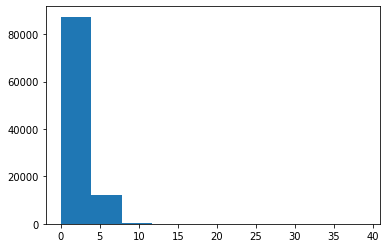

In [26]:
plt.hist(branches['nMuon'])

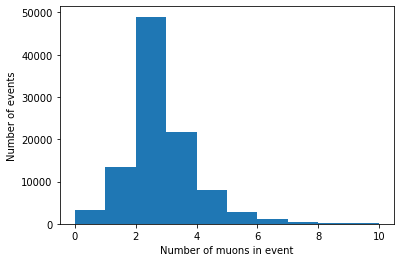

In [31]:
# Plotting
plt.hist(branches['nMuon'], bins=10, range=(0, 10))
plt.xlabel('Number of muons in event')
plt.ylabel('Number of events')
plt.show()

In [ ]:
# Math operation
#print("mean:", np.mean(branches['nMuon']))
#print("std:", np.std(branches['nMuon']))
#print("max:", np.min(branches['nMuon']))
#print("min:", np.max(branches['nMuon']))
#np.std(branches['nMuon'])
#ak.mean(branches['nMuon'])

ak.flatten(branches['Muon_pt'])
branches['Muon_pt']


[10.8, 15.7, 10.5, 16.3, 3.28, 11.4, ..., 5.09, 3.31, 15.7, 11.4, 3.08, 4.97]
[[10.8, 15.7], [10.5, 16.3], [3.28], ..., [3.31, 15.7], [11.4, 3.08, 4.97]]


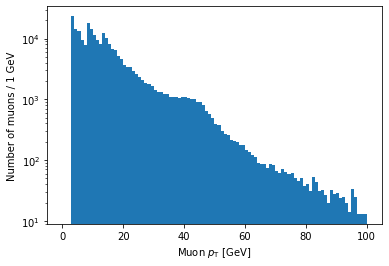

In [63]:
# Log scale plotting
print(ak.flatten(branches['Muon_pt']))
print(branches['Muon_pt'])

plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.yscale('log')
plt.show()

100000
100000
100000
235286
13447
13447


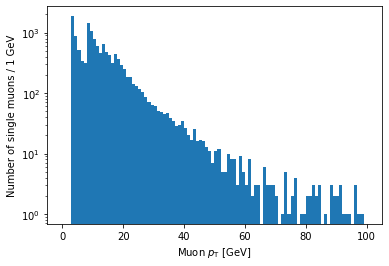

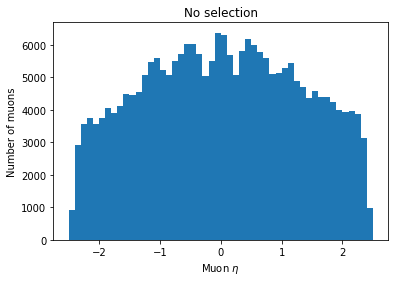

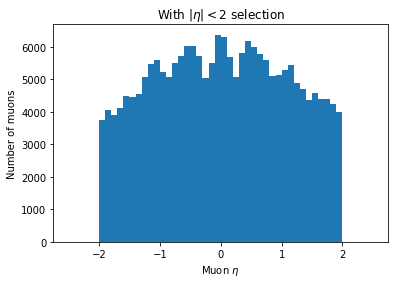

In [69]:
# Counting with selections
print(len(branches))
print(len(branches['nMuon']))
print(len(branches['Muon_pt']))  # or any of the other branches...)

print(len(ak.flatten(branches['Muon_pt'])))

single_muon_mask = branches['nMuon'] == 1
print(np.sum(single_muon_mask))
print(len(branches['Muon_pt'][single_muon_mask]))

plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
plt.yscale('log')
plt.show()

eta_mask = abs(branches['Muon_eta']) < 2
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

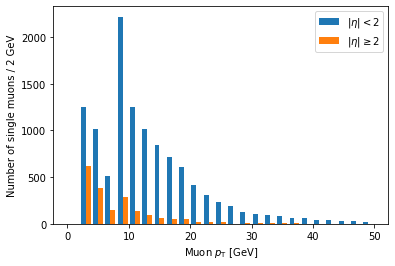

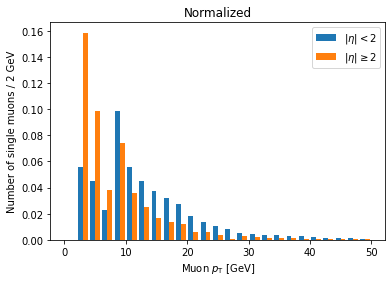

In [71]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50), density=True)
plt.title('Normalized')
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

In [74]:
# row based vs columner
%%time

eta_count = 0

for event in branches['Muon_eta']:
    for eta in event:
        if abs(eta) < 2:
            eta_count += 1

eta_count

CPU times: user 4.52 s, sys: 45.5 ms, total: 4.56 s
Wall time: 4.86 s


204564

In [75]:
%%time

np.sum(abs(branches['Muon_eta']) < 2)

CPU times: user 3.66 ms, sys: 1.58 ms, total: 5.25 ms
Wall time: 4.25 ms


204564

In [100]:
# Getting Physics-Relevant Information
two_muons_mask = branches['nMuon'] == 2
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'], 'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})
print(type(muon_p4))
two_muons_p4 = muon_p4[two_muons_mask]
print(len(two_muons_p4))

print(muon_p4[5].tolist())
print(two_muons_p4[5].tolist())

print(two_muons_p4[5].mass)
print(two_muons_p4[5].pt)
print(two_muons_p4[5].eta)

<class 'vector._backends.awkward_.MomentumArray4D'>
48976
[{'rho': 3.566528081893921, 'phi': -2.9090449810028076, 'eta': -1.371932029724121, 'tau': 0.10565836727619171}, {'rho': 4.572504043579102, 'phi': 2.4552080631256104, 'eta': -0.703264594078064, 'tau': 0.10565836727619171}, {'rho': 4.371862888336182, 'phi': -3.059392213821411, 'eta': -1.0399996042251587, 'tau': 0.10565836727619171}]
[{'rho': 11.470704078674316, 'phi': 3.1309704780578613, 'eta': 2.3417420387268066, 'tau': 0.10565836727619171}, {'rho': 3.4690065383911133, 'phi': 3.0211737155914307, 'eta': 2.3523731231689453, 'tau': 0.10565836727619171}]
[0.106, 0.106]
[11.5, 3.47]
[2.34, 2.35]


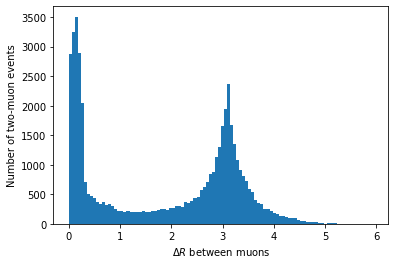

In [104]:
# Delta R
first_muon_p4 = two_muons_p4[:,0]
second_muon_p4 = two_muons_p4[:,1]
first_muon_p4.deltaR(second_muon_p4)

plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

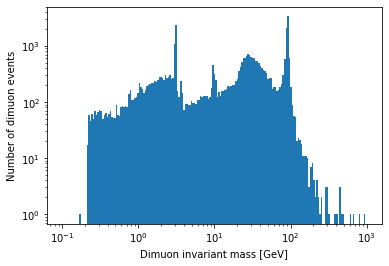

In [110]:
# Invariant mass
sum_p4 = first_muon_p4 + second_muon_p4
two_muons_charges = branches['Muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
dimuon_p4 = sum_p4[opposite_sign_muons_mask]

plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

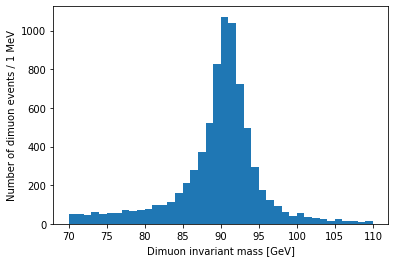

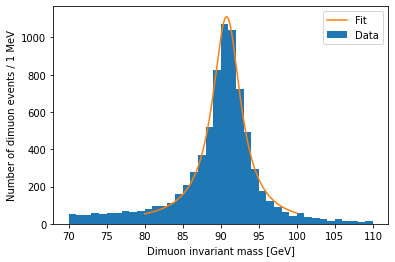

In [109]:
# Fit the Z-boson peak
plt.hist(dimuon_p4.mass, bins=40, range=(70, 110))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.show()

from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(dimuon_p4.mass.to_numpy(), bins=20, range=(80, 100))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[90, 10, 1000], sigma=np.sqrt(bin_contents))

plt.hist(dimuon_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()